In [1]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

In [10]:
xs = np.linspace(-5, 10, 200) # 200 points spaced equally from -5 to 10
ks = np.arange(50) # array containing a list of numbers from 0 to 49

### Discrete PMFs (probability mass function)

Binomial distribution, Poisson distribution

0.09851840993941652
0.00022087848072126846


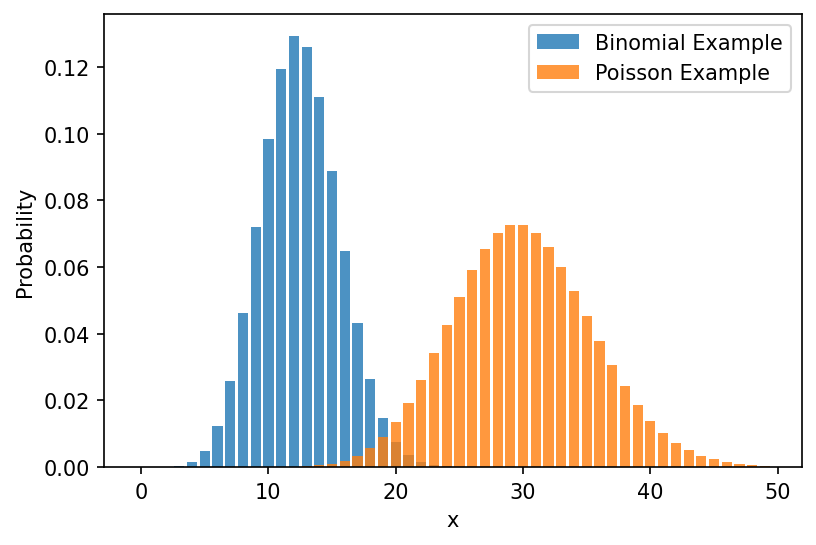

In [14]:
# Binomial Distribution (e.g., dice)
# PMF for the ks values given that we have 50 events with each event having a 25% chance of successfully happening
pmf_binom = st.binom.pmf(ks, 50, 0.25) # A 4-sided die....
plt.rcParams['figure.dpi'] = 150
plt.bar(ks, pmf_binom, label="Binomial Example", alpha=0.8)

# Poisson Distribution (e.g., car crashes)
pmf_poisson = st.poisson.pmf(ks, 30) # A rate of 30
plt.bar(ks, pmf_poisson, label="Poisson Example", alpha=0.8)
plt.ylabel("Probability")
plt.xlabel("x")
plt.legend();

# What is the chance you roll 10 ones on a 4-sided die when you've 50 times?
print(st.binom.pmf(10, 50, 0.25))

# If we have 30 car crashes a night, what is the chance we get 50?
print(st.poisson.pmf(50, 30))

### Continuous Distributions

PDFs (Probability Distribution Function)

Uniform, normal, exponential, student-t, log-normal, skew-normal.

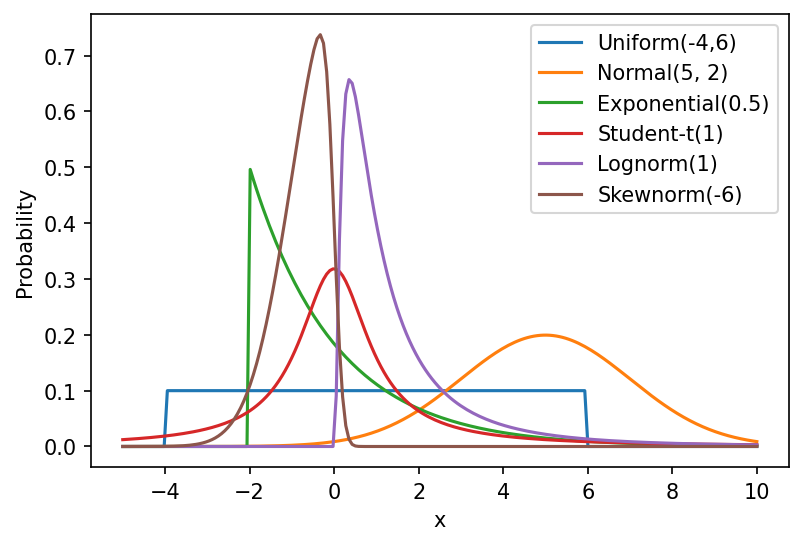

In [15]:
# Uniform Distributiom
pdf_uniform = st.uniform.pdf(xs, -4, 10) # a,b -> lower and upper bounds
plt.plot(xs, pdf_uniform, label="Uniform(-4,6)")

# Normal Distribution
# You don't need to explicitly type it, (xs,5,2) is okay
pdf_normal = st.norm.pdf(xs, loc=5, scale=2) # 5,2 -> location (mean) and scale (std). 
plt.plot(xs, pdf_normal, label="Normal(5, 2)")

# Exponential Distribution
# the rate (lambda) is emulated by the scale (essentially, rate (lambda) = 1/scale)
pdf_exponential = st.expon.pdf(xs, loc=-2, scale=2)
plt.plot(xs, pdf_exponential, label="Exponential(0.5)")

# Student-T Distribution
pdf_studentt = st.t.pdf(xs, 1) # 1 -> degrees of freedom (the number of datapoints - 1)
plt.plot(xs, pdf_studentt, label="Student-t(1)")

# Log-Normal Distribution
pdf_lognorm = st.lognorm.pdf(xs, 1) # 1 -> scale parameter (skewness)
plt.plot(xs, pdf_lognorm, label="Lognorm(1)")

# Skew-Normal Distribution
pdf_skewnorm = st.skewnorm.pdf(xs, -6) # -6 -> scale parameter (skewness)
plt.plot(xs, pdf_skewnorm, label="Skewnorm(-6)")

plt.legend()
plt.ylabel("Probability")
plt.xlabel("x");

# The jaggedness of the lines are due to the few datapoints available to plot
# Note: all these distributions accept a loc and scale parameter

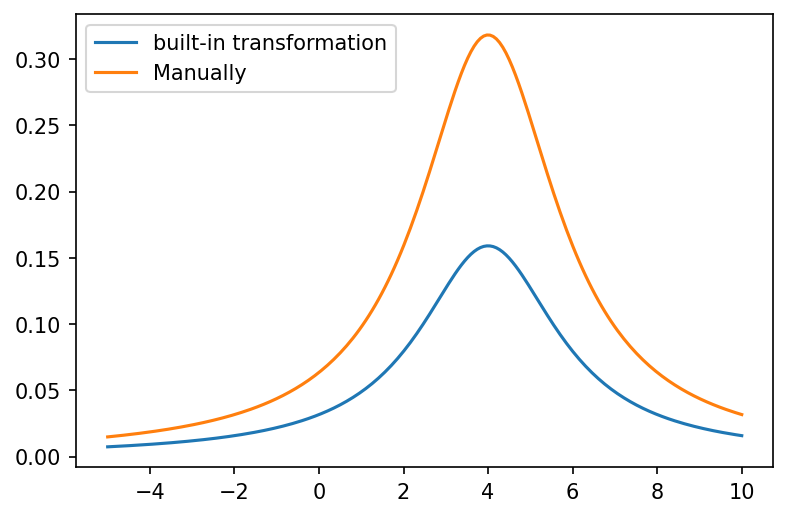

In [16]:
plt.plot(xs, st.t.pdf(xs, 1, loc=4, scale=2), label="built-in transformation")
# loc and scale doesn't do much, just a linear transformation. 
# Effectively, it just shifts the xs and scales it.. a modification of the input data
# Doesn't really matter whether or not we bother with this, it just conveniently shifts the data to the right place
plt.plot(xs, st.t.pdf((xs-4)/2, 1, loc=0, scale=1), label="Manual transformation")
plt.legend();
# Plots are in the same place (should be identical)
# Note: The shift in amplitude is because in the built-in function, it computes the normalization factor,
# while in the manual method, you have to precompute it yourself..